<a href="https://colab.research.google.com/github/miraqulass/MachineLearning/blob/MLPractices/Final_yr_Project_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

Connect Google Colab to Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ProjectStart/

/content/drive/MyDrive/ProjectStart


In [ ]:
!pip install scikit-learn==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('synthetic_vehicle_dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Vehicle_ID                      6000 non-null   float64
 1   Vehicle_Type                    6000 non-null   object 
 2   Vehicle_Mileage                 6000 non-null   float64
 3   Vehicle_Age                     6000 non-null   float64
 4   Timestamp                       6000 non-null   object 
 5   Speed                           6000 non-null   float64
 6   Fuel_Consumption                6000 non-null   float64
 7   Engine_Temperature              6000 non-null   float64
 8   Oil_Pressure                    6000 non-null   float64
 9   Mileage_Since_Last_Maintenance  6000 non-null   float64
 10  Maintenance_Timestamp           6000 non-null   object 
 11  Maintenance_Type                6000 non-null   object 
 12  Engine_Health                   60

In [ ]:
data.describe()

,Vehicle_ID,Vehicle_Mileage,Vehicle_Age,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,Engine_Health,Brake_Health,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.0
mean,1500.500000,74811.480333,5.028333,60.126292,5.860531,83.361230,70.454779,2761.091667,0.882919,0.979007,...,1.011872,0.949572,0.497297,0.496020,0.496328,-0.002046,0.001021,0.020665,-0.008050,0.0
std,866.097533,43314.859467,2.577590,25.920680,5.525232,7.434265,25.685337,1320.221367,0.029268,0.042271,...,0.027573,0.017541,0.295584,0.287819,0.288370,1.007997,1.004962,0.996008,1.011010,0.0
min,1.000000,30.000000,1.000000,10.045404,-13.200484,70.004838,20.012371,501.000000,0.795842,0.827041,...,0.935954,0.914275,0.000002,0.000223,0.000357,-4.043574,-3.429880,-2.969341,-3.237560,0.0
25%,750.750000,37012.500000,3.000000,39.132961,2.012589,77.459161,50.373257,1594.000000,0.861701,0.948546,...,0.991920,0.934841,0.234654,0.239912,0.244221,-0.684681,-0.679134,-0.658651,-0.693206,0.0
50%,1500.500000,75083.500000,5.000000,58.947685,5.821785,83.419217,68.368881,2765.000000,0.880594,0.980010,...,1.011345,0.948634,0.489664,0.497833,0.502050,-0.024784,0.016370,0.014400,0.004925,0.0
75%,2250.250000,112850.250000,7.000000,78.655813,9.540795,88.361164,90.467939,3916.250000,0.902055,1.009078,...,1.032447,0.965095,0.755970,0.746692,0.742174,0.695234,0.696224,0.674030,0.676361,0.0
max,3000.000000,149959.000000,9.000000,119.769831,21.954239,99.915652,119.928383,4998.000000,0.980957,1.096549,...,1.087165,0.982586,0.999707,0.998989,0.999943,4.443611,4.168237,3.585497,3.717882,0.0


In [ ]:
data.isnull().sum()

Vehicle_ID                           7
Vehicle_Type                         7
Vehicle_Mileage                      7
Vehicle_Age                          7
Timestamp                            7
Speed                                7
Fuel_Consumption                     7
Engine_Temperature                   7
Oil_Pressure                         7
Mileage_Since_Last_Maintenance       7
Maintenance_Timestamp                7
Maintenance_Type                     7
Engine_Health                        7
Brake_Health                         7
Battery_Health                       7
Transmission_Health                  7
Fuel_System_Health                   7
Cooling_System_Health                7
Harsh_Acceleration                   7
Harsh_Braking                        7
Sharp_Turns                          7
Accelerometer                        7
Temperature_Sensor                   7
Pressure_Sensor                      7
Vibration_Sensor                     7
0                        

In [ ]:
data.dropna(subset=['0'])

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
6001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
data.isnull().sum()

Vehicle_ID                           7
Vehicle_Type                         7
Vehicle_Mileage                      7
Vehicle_Age                          7
Timestamp                            7
Speed                                7
Fuel_Consumption                     7
Engine_Temperature                   7
Oil_Pressure                         7
Mileage_Since_Last_Maintenance       7
Maintenance_Timestamp                7
Maintenance_Type                     7
Engine_Health                        7
Brake_Health                         7
Battery_Health                       7
Transmission_Health                  7
Fuel_System_Health                   7
Cooling_System_Health                7
Harsh_Acceleration                   7
Harsh_Braking                        7
Sharp_Turns                          7
Accelerometer                        7
Temperature_Sensor                   7
Pressure_Sensor                      7
Vibration_Sensor                     7
0                        

In [ ]:
data

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
0,1.0,fleet,38335.0,9.0,2021-10-25,93.412763,7.777502,81.917671,100.096987,4241.0,...,1.041284,0.927849,0.711451,0.927710,0.216175,-0.395185,-1.459581,0.846334,1.691012,NaN
1,1.0,fleet,38335.0,9.0,2021-07-02,51.924580,8.117362,93.980445,57.407542,4221.0,...,0.996748,0.972273,0.675729,0.404800,0.057745,-0.328261,-0.229434,-0.062292,0.777937,NaN
2,2.0,personal,33607.0,7.0,2021-01-13,53.742982,2.933089,86.647699,20.802439,2518.0,...,0.951705,0.966981,0.371553,0.287541,0.572824,-0.298502,-1.636626,0.301250,-0.343627,NaN
3,2.0,personal,33607.0,7.0,2021-04-24,75.447566,16.097000,75.157630,47.713791,2753.0,...,0.987201,0.926145,0.674291,0.200724,0.729749,-0.580544,-0.705524,1.348919,0.821824,NaN
4,3.0,personal,123492.0,2.0,2022-07-04,87.446859,4.051953,86.169550,65.309212,4827.0,...,1.024571,0.969112,0.126021,0.318178,0.378969,0.901771,0.831365,0.313444,-0.592426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
data.tail(20)

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
5987,2994.0,personal,86569.0,2.0,2022-08-07,55.462777,1.710352,81.395471,54.504397,2230.0,...,1.009836,0.948350,0.468507,0.186529,0.251152,-1.488871,-1.299549,0.457897,-1.185721,NaN
5988,2995.0,fleet,97159.0,2.0,2022-04-02,63.752056,0.111978,97.753332,60.479939,3328.0,...,1.007246,0.977086,0.897895,0.094013,0.243816,0.651108,-0.608878,1.522424,-0.710887,NaN
5989,2995.0,fleet,97159.0,2.0,2021-11-24,68.938338,6.220642,86.094753,80.642652,2224.0,...,1.012078,0.934717,0.126730,0.377078,0.927402,0.971323,-0.779997,-0.127041,-0.250976,NaN
5990,2996.0,personal,79378.0,1.0,2021-05-31,94.611197,11.077354,86.542698,40.569750,4336.0,...,0.991099,0.935047,0.965754,0.072438,0.310401,0.070406,2.400359,0.826925,-0.354466,NaN
5991,2996.0,personal,79378.0,1.0,2021-09-25,67.222286,15.602040,88.104547,78.627638,3442.0,...,1.031047,0.968694,0.868807,0.972977,0.188157,0.431509,0.050494,0.906845,-1.392597,NaN
5992,2997.0,fleet,64877.0,3.0,2022-08-02,87.879315,3.748247,84.027405,92.019802,4484.0,...,1.029134,0.934943,0.546499,0.544636,0.321944,1.346543,0.734308,-0.041259,1.129924,NaN
5993,2997.0,fleet,64877.0,3.0,2021-12-16,77.136536,8.500354,85.230961,28.236547,4239.0,...,0.974051,0.968381,0.296647,0.291032,0.395569,1.973622,0.910572,0.845517,0.591741,NaN
5994,2998.0,public,99102.0,2.0,2022-09-24,41.303074,-5.641865,71.680234,92.782753,785.0,...,1.008095,0.920825,0.061881,0.745845,0.223801,0.961751,-0.558836,-0.002461,1.315463,NaN
5995,2998.0,public,99102.0,2.0,2022-08-13,79.834978,2.623031,91.744160,47.933284,2018.0,...,0.999286,0.971410,0.157797,0.965722,0.826331,-0.334317,-1.185032,0.470345,0.991188,NaN
5996,2999.0,personal,145018.0,8.0,2022-11-02,43.834071,-0.308881,84.212789,111.620760,4924.0,...,1.025062,0.933040,0.212360,0.343410,0.954623,-0.103055,-1.108068,-1.169614,-0.616947,NaN


In [ ]:
data.interpolate()

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
0,1.0,fleet,38335.0,9.0,2021-10-25,93.412763,7.777502,81.917671,100.096987,4241.0,...,1.041284,0.927849,0.711451,0.927710,0.216175,-0.395185,-1.459581,0.846334,1.691012,NaN
1,1.0,fleet,38335.0,9.0,2021-07-02,51.924580,8.117362,93.980445,57.407542,4221.0,...,0.996748,0.972273,0.675729,0.404800,0.057745,-0.328261,-0.229434,-0.062292,0.777937,NaN
2,2.0,personal,33607.0,7.0,2021-01-13,53.742982,2.933089,86.647699,20.802439,2518.0,...,0.951705,0.966981,0.371553,0.287541,0.572824,-0.298502,-1.636626,0.301250,-0.343627,NaN
3,2.0,personal,33607.0,7.0,2021-04-24,75.447566,16.097000,75.157630,47.713791,2753.0,...,0.987201,0.926145,0.674291,0.200724,0.729749,-0.580544,-0.705524,1.348919,0.821824,NaN
4,3.0,personal,123492.0,2.0,2022-07-04,87.446859,4.051953,86.169550,65.309212,4827.0,...,1.024571,0.969112,0.126021,0.318178,0.378969,0.901771,0.831365,0.313444,-0.592426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,3000.0,NaN,111419.0,1.0,NaN,56.908465,2.593886,74.746688,84.352678,4291.0,...,1.009257,0.927634,0.831474,0.537690,0.475265,-1.230225,0.902638,-0.175674,1.050759,0.0
6003,3000.0,NaN,111419.0,1.0,NaN,56.908465,2.593886,74.746688,84.352678,4291.0,...,1.009257,0.927634,0.831474,0.537690,0.475265,-1.230225,0.902638,-0.175674,1.050759,0.0
6004,3000.0,NaN,111419.0,1.0,NaN,56.908465,2.593886,74.746688,84.352678,4291.0,...,1.009257,0.927634,0.831474,0.537690,0.475265,-1.230225,0.902638,-0.175674,1.050759,0.0
6005,3000.0,NaN,111419.0,1.0,NaN,56.908465,2.593886,74.746688,84.352678,4291.0,...,1.009257,0.927634,0.831474,0.537690,0.475265,-1.230225,0.902638,-0.175674,1.050759,0.0


In [ ]:
data.tail(7)

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
data.drop([6000, 6001, 6002, 6003, 6004, 6005, 6006])

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
0,1.0,fleet,38335.0,9.0,2021-10-25,93.412763,7.777502,81.917671,100.096987,4241.0,...,1.041284,0.927849,0.711451,0.927710,0.216175,-0.395185,-1.459581,0.846334,1.691012,NaN
1,1.0,fleet,38335.0,9.0,2021-07-02,51.924580,8.117362,93.980445,57.407542,4221.0,...,0.996748,0.972273,0.675729,0.404800,0.057745,-0.328261,-0.229434,-0.062292,0.777937,NaN
2,2.0,personal,33607.0,7.0,2021-01-13,53.742982,2.933089,86.647699,20.802439,2518.0,...,0.951705,0.966981,0.371553,0.287541,0.572824,-0.298502,-1.636626,0.301250,-0.343627,NaN
3,2.0,personal,33607.0,7.0,2021-04-24,75.447566,16.097000,75.157630,47.713791,2753.0,...,0.987201,0.926145,0.674291,0.200724,0.729749,-0.580544,-0.705524,1.348919,0.821824,NaN
4,3.0,personal,123492.0,2.0,2022-07-04,87.446859,4.051953,86.169550,65.309212,4827.0,...,1.024571,0.969112,0.126021,0.318178,0.378969,0.901771,0.831365,0.313444,-0.592426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2998.0,public,99102.0,2.0,2022-08-13,79.834978,2.623031,91.744160,47.933284,2018.0,...,0.999286,0.971410,0.157797,0.965722,0.826331,-0.334317,-1.185032,0.470345,0.991188,NaN
5996,2999.0,personal,145018.0,8.0,2022-11-02,43.834071,-0.308881,84.212789,111.620760,4924.0,...,1.025062,0.933040,0.212360,0.343410,0.954623,-0.103055,-1.108068,-1.169614,-0.616947,NaN
5997,2999.0,personal,145018.0,8.0,2021-08-01,72.087817,6.512982,84.910118,59.676727,2145.0,...,1.024664,0.955711,0.954727,0.106163,0.069774,-1.377336,-1.205900,-0.577725,-0.002340,NaN
5998,3000.0,fleet,111419.0,1.0,2021-08-06,84.646175,16.027134,80.668328,36.943040,2390.0,...,0.988589,0.963522,0.314486,0.959812,0.732044,-0.862073,1.835722,1.794953,-0.250924,NaN


In [ ]:
data.drop(['0'], axis=1)
data.drop([6000, 6001, 6002, 6003, 6004, 6005, 6006])

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,0
0,1.0,fleet,38335.0,9.0,2021-10-25,93.412763,7.777502,81.917671,100.096987,4241.0,...,1.041284,0.927849,0.711451,0.927710,0.216175,-0.395185,-1.459581,0.846334,1.691012,NaN
1,1.0,fleet,38335.0,9.0,2021-07-02,51.924580,8.117362,93.980445,57.407542,4221.0,...,0.996748,0.972273,0.675729,0.404800,0.057745,-0.328261,-0.229434,-0.062292,0.777937,NaN
2,2.0,personal,33607.0,7.0,2021-01-13,53.742982,2.933089,86.647699,20.802439,2518.0,...,0.951705,0.966981,0.371553,0.287541,0.572824,-0.298502,-1.636626,0.301250,-0.343627,NaN
3,2.0,personal,33607.0,7.0,2021-04-24,75.447566,16.097000,75.157630,47.713791,2753.0,...,0.987201,0.926145,0.674291,0.200724,0.729749,-0.580544,-0.705524,1.348919,0.821824,NaN
4,3.0,personal,123492.0,2.0,2022-07-04,87.446859,4.051953,86.169550,65.309212,4827.0,...,1.024571,0.969112,0.126021,0.318178,0.378969,0.901771,0.831365,0.313444,-0.592426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2998.0,public,99102.0,2.0,2022-08-13,79.834978,2.623031,91.744160,47.933284,2018.0,...,0.999286,0.971410,0.157797,0.965722,0.826331,-0.334317,-1.185032,0.470345,0.991188,NaN
5996,2999.0,personal,145018.0,8.0,2022-11-02,43.834071,-0.308881,84.212789,111.620760,4924.0,...,1.025062,0.933040,0.212360,0.343410,0.954623,-0.103055,-1.108068,-1.169614,-0.616947,NaN
5997,2999.0,personal,145018.0,8.0,2021-08-01,72.087817,6.512982,84.910118,59.676727,2145.0,...,1.024664,0.955711,0.954727,0.106163,0.069774,-1.377336,-1.205900,-0.577725,-0.002340,NaN
5998,3000.0,fleet,111419.0,1.0,2021-08-06,84.646175,16.027134,80.668328,36.943040,2390.0,...,0.988589,0.963522,0.314486,0.959812,0.732044,-0.862073,1.835722,1.794953,-0.250924,NaN


In [ ]:
data.isnull().sum()

Vehicle_ID                           7
Vehicle_Type                         7
Vehicle_Mileage                      7
Vehicle_Age                          7
Timestamp                            7
Speed                                7
Fuel_Consumption                     7
Engine_Temperature                   7
Oil_Pressure                         7
Mileage_Since_Last_Maintenance       7
Maintenance_Timestamp                7
Maintenance_Type                     7
Engine_Health                        7
Brake_Health                         7
Battery_Health                       7
Transmission_Health                  7
Fuel_System_Health                   7
Cooling_System_Health                7
Harsh_Acceleration                   7
Harsh_Braking                        7
Sharp_Turns                          7
Accelerometer                        7
Temperature_Sensor                   7
Pressure_Sensor                      7
Vibration_Sensor                     7
0                        

In [ ]:
data = data.drop([6000, 6001, 6002, 6003, 6004, 6005, 6006])
print(data)

      Vehicle_ID Vehicle_Type  Vehicle_Mileage  Vehicle_Age   Timestamp  \
0            1.0        fleet          38335.0          9.0  2021-10-25   
1            1.0        fleet          38335.0          9.0  2021-07-02   
2            2.0     personal          33607.0          7.0  2021-01-13   
3            2.0     personal          33607.0          7.0  2021-04-24   
4            3.0     personal         123492.0          2.0  2022-07-04   
...          ...          ...              ...          ...         ...   
5995      2998.0       public          99102.0          2.0  2022-08-13   
5996      2999.0     personal         145018.0          8.0  2022-11-02   
5997      2999.0     personal         145018.0          8.0  2021-08-01   
5998      3000.0        fleet         111419.0          1.0  2021-08-06   
5999      3000.0        fleet         111419.0          1.0  2022-07-03   

          Speed  Fuel_Consumption  Engine_Temperature  Oil_Pressure  \
0     93.412763          7.7

In [ ]:
data = data.drop(['0'], axis=1)
print(data)

      Vehicle_ID Vehicle_Type  Vehicle_Mileage  Vehicle_Age   Timestamp  \
0            1.0        fleet          38335.0          9.0  2021-10-25   
1            1.0        fleet          38335.0          9.0  2021-07-02   
2            2.0     personal          33607.0          7.0  2021-01-13   
3            2.0     personal          33607.0          7.0  2021-04-24   
4            3.0     personal         123492.0          2.0  2022-07-04   
...          ...          ...              ...          ...         ...   
5995      2998.0       public          99102.0          2.0  2022-08-13   
5996      2999.0     personal         145018.0          8.0  2022-11-02   
5997      2999.0     personal         145018.0          8.0  2021-08-01   
5998      3000.0        fleet         111419.0          1.0  2021-08-06   
5999      3000.0        fleet         111419.0          1.0  2022-07-03   

          Speed  Fuel_Consumption  Engine_Temperature  Oil_Pressure  \
0     93.412763          7.7

In [ ]:
data.nunique()

Vehicle_ID                        3000
Vehicle_Type                         3
Vehicle_Mileage                   2962
Vehicle_Age                          9
Timestamp                          724
Speed                             3000
Fuel_Consumption                  3000
Engine_Temperature                3000
Oil_Pressure                      3000
Mileage_Since_Last_Maintenance    2201
Maintenance_Timestamp              884
Maintenance_Type                     4
Engine_Health                     3000
Brake_Health                      3000
Battery_Health                    3000
Transmission_Health               3000
Fuel_System_Health                3000
Cooling_System_Health             3000
Harsh_Acceleration                3000
Harsh_Braking                     3000
Sharp_Turns                       3000
Accelerometer                     3000
Temperature_Sensor                3000
Pressure_Sensor                   3000
Vibration_Sensor                  3000
dtype: int64

In [ ]:
data.shape

(6000, 25)

In [ ]:
data.isnull().sum()

Vehicle_ID                        0
Vehicle_Type                      0
Vehicle_Mileage                   0
Vehicle_Age                       0
Timestamp                         0
Speed                             0
Fuel_Consumption                  0
Engine_Temperature                0
Oil_Pressure                      0
Mileage_Since_Last_Maintenance    0
Maintenance_Timestamp             0
Maintenance_Type                  0
Engine_Health                     0
Brake_Health                      0
Battery_Health                    0
Transmission_Health               0
Fuel_System_Health                0
Cooling_System_Health             0
Harsh_Acceleration                0
Harsh_Braking                     0
Sharp_Turns                       0
Accelerometer                     0
Temperature_Sensor                0
Pressure_Sensor                   0
Vibration_Sensor                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Vehicle_ID                      6000 non-null   float64
 1   Vehicle_Type                    6000 non-null   object 
 2   Vehicle_Mileage                 6000 non-null   float64
 3   Vehicle_Age                     6000 non-null   float64
 4   Timestamp                       6000 non-null   object 
 5   Speed                           6000 non-null   float64
 6   Fuel_Consumption                6000 non-null   float64
 7   Engine_Temperature              6000 non-null   float64
 8   Oil_Pressure                    6000 non-null   float64
 9   Mileage_Since_Last_Maintenance  6000 non-null   float64
 10  Maintenance_Timestamp           6000 non-null   object 
 11  Maintenance_Type                6000 non-null   object 
 12  Engine_Health                   60

[]

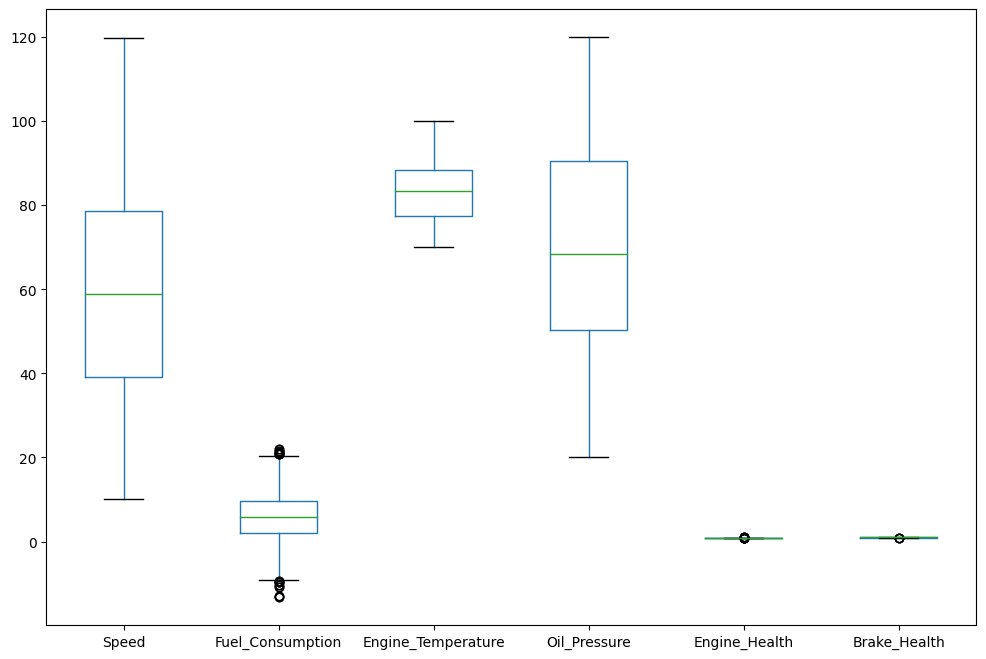

In [ ]:
plt.figure(figsize=(12, 8))
boxplot = data.boxplot(column = ['Speed', 'Fuel_Consumption', 'Engine_Temperature', 'Oil_Pressure', 'Engine_Health', 'Brake_Health'], grid=False)
boxplot.plot()

<ipython-input-26-a191605719bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


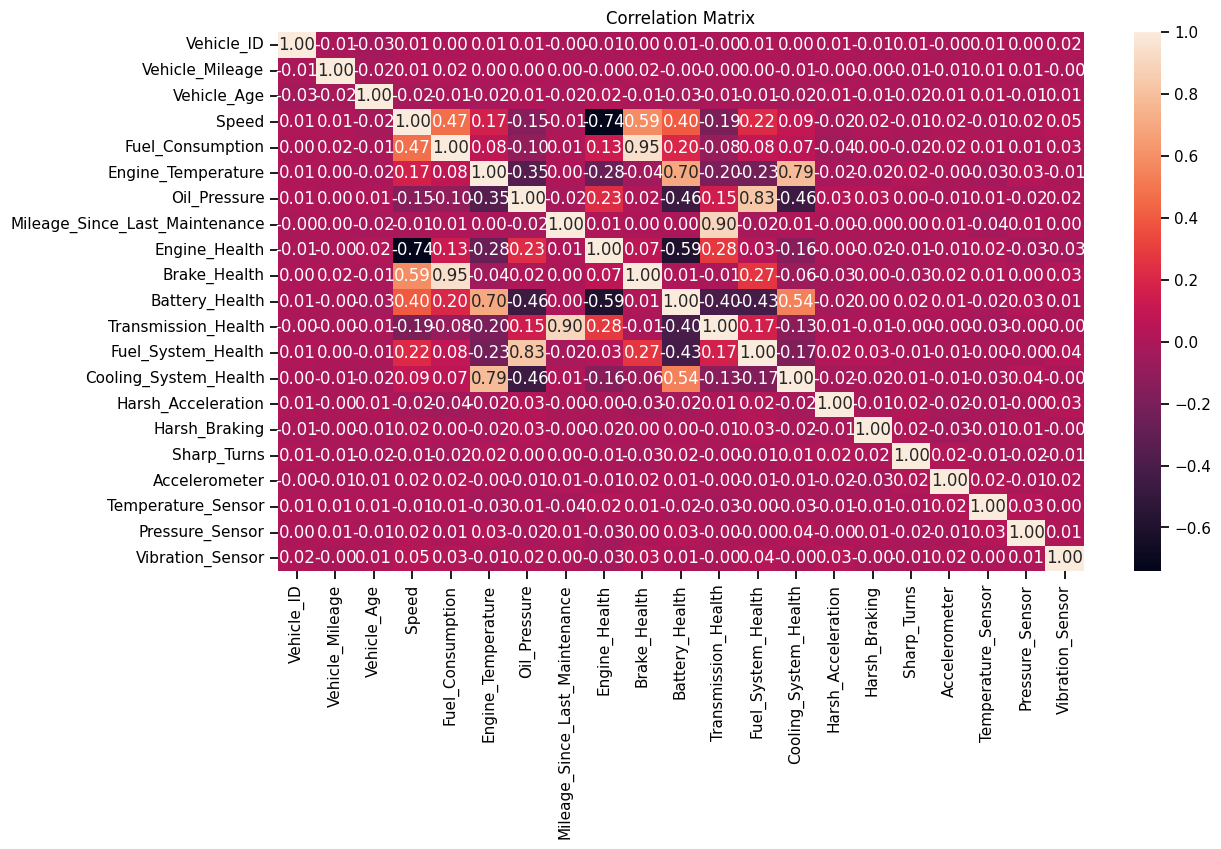

In [ ]:
correlation_matrix = data.corr()
sns.set_context('notebook', font_scale=1.0, rc={'lines.linewitdh': 2.5})
plt.figure(figsize = (13,7))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.describe()

,Vehicle_ID,Vehicle_Mileage,Vehicle_Age,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,Engine_Health,Brake_Health,...,Transmission_Health,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1500.500000,74811.480333,5.028333,60.126292,5.860531,83.361230,70.454779,2761.091667,0.882919,0.979007,...,0.918486,1.011872,0.949572,0.497297,0.496020,0.496328,-0.002046,0.001021,0.020665,-0.008050
std,866.097533,43314.859467,2.577590,25.920680,5.525232,7.434265,25.685337,1320.221367,0.029268,0.042271,...,0.029289,0.027573,0.017541,0.295584,0.287819,0.288370,1.007997,1.004962,0.996008,1.011010
min,1.000000,30.000000,1.000000,10.045404,-13.200484,70.004838,20.012371,501.000000,0.795842,0.827041,...,0.856592,0.935954,0.914275,0.000002,0.000223,0.000357,-4.043574,-3.429880,-2.969341,-3.237560
25%,750.750000,37012.500000,3.000000,39.132961,2.012589,77.459161,50.373257,1594.000000,0.861701,0.948546,...,0.895203,0.991920,0.934841,0.234654,0.239912,0.244221,-0.684681,-0.679134,-0.658651,-0.693206
50%,1500.500000,75083.500000,5.000000,58.947685,5.821785,83.419217,68.368881,2765.000000,0.880594,0.980010,...,0.918418,1.011345,0.948634,0.489664,0.497833,0.502050,-0.024784,0.016370,0.014400,0.004925
75%,2250.250000,112850.250000,7.000000,78.655813,9.540795,88.361164,90.467939,3916.250000,0.902055,1.009078,...,0.941087,1.032447,0.965095,0.755970,0.746692,0.742174,0.695234,0.696224,0.674030,0.676361
max,3000.000000,149959.000000,9.000000,119.769831,21.954239,99.915652,119.928383,4998.000000,0.980957,1.096549,...,0.983932,1.087165,0.982586,0.999707,0.998989,0.999943,4.443611,4.168237,3.585497,3.717882


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Maintenance_Timestamp'] = pd.to_datetime(data['Maintenance_Timestamp'])

In [ ]:
data.sort_values(by=['Vehicle_ID', 'Timestamp'], inplace=True)

In [ ]:
data

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Transmission_Health,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor
1,1.0,fleet,38335.0,9.0,2021-07-02,51.924580,8.117362,93.980445,57.407542,4221.0,...,0.935414,0.996748,0.972273,0.675729,0.404800,0.057745,-0.328261,-0.229434,-0.062292,0.777937
0,1.0,fleet,38335.0,9.0,2021-10-25,93.412763,7.777502,81.917671,100.096987,4241.0,...,0.947080,1.041284,0.927849,0.711451,0.927710,0.216175,-0.395185,-1.459581,0.846334,1.691012
2,2.0,personal,33607.0,7.0,2021-01-13,53.742982,2.933089,86.647699,20.802439,2518.0,...,0.900827,0.951705,0.966981,0.371553,0.287541,0.572824,-0.298502,-1.636626,0.301250,-0.343627
3,2.0,personal,33607.0,7.0,2021-04-24,75.447566,16.097000,75.157630,47.713791,2753.0,...,0.911825,0.987201,0.926145,0.674291,0.200724,0.729749,-0.580544,-0.705524,1.348919,0.821824
5,3.0,personal,123492.0,2.0,2022-01-22,83.142678,6.925309,73.821462,41.803935,2824.0,...,0.915598,0.986788,0.924636,0.326322,0.274907,0.293711,-1.205690,0.247570,-0.486658,0.919810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,2998.0,public,99102.0,2.0,2022-09-24,41.303074,-5.641865,71.680234,92.782753,785.0,...,0.878212,1.008095,0.920825,0.061881,0.745845,0.223801,0.961751,-0.558836,-0.002461,1.315463
5997,2999.0,personal,145018.0,8.0,2021-08-01,72.087817,6.512982,84.910118,59.676727,2145.0,...,0.924121,1.024664,0.955711,0.954727,0.106163,0.069774,-1.377336,-1.205900,-0.577725,-0.002340
5996,2999.0,personal,145018.0,8.0,2022-11-02,43.834071,-0.308881,84.212789,111.620760,4924.0,...,0.963176,1.025062,0.933040,0.212360,0.343410,0.954623,-0.103055,-1.108068,-1.169614,-0.616947
5998,3000.0,fleet,111419.0,1.0,2021-08-06,84.646175,16.027134,80.668328,36.943040,2390.0,...,0.901602,0.988589,0.963522,0.314486,0.959812,0.732044,-0.862073,1.835722,1.794953,-0.250924


In [ ]:
data['RUL'] = data.groupby('Vehicle_ID')['Timestamp'].transform(lambda x: x.max() - x)

In [ ]:
data['RUL'].dt.days

1       115
0         0
2       101
3         0
5       163
       ... 
5994      0
5997    458
5996      0
5998    331
5999      0
Name: RUL, Length: 6000, dtype: int64

In [ ]:
data

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,RUL
1,1.0,fleet,38335.0,9.0,2021-07-02,51.924580,8.117362,93.980445,57.407542,4221.0,...,0.996748,0.972273,0.675729,0.404800,0.057745,-0.328261,-0.229434,-0.062292,0.777937,115 days
0,1.0,fleet,38335.0,9.0,2021-10-25,93.412763,7.777502,81.917671,100.096987,4241.0,...,1.041284,0.927849,0.711451,0.927710,0.216175,-0.395185,-1.459581,0.846334,1.691012,0 days
2,2.0,personal,33607.0,7.0,2021-01-13,53.742982,2.933089,86.647699,20.802439,2518.0,...,0.951705,0.966981,0.371553,0.287541,0.572824,-0.298502,-1.636626,0.301250,-0.343627,101 days
3,2.0,personal,33607.0,7.0,2021-04-24,75.447566,16.097000,75.157630,47.713791,2753.0,...,0.987201,0.926145,0.674291,0.200724,0.729749,-0.580544,-0.705524,1.348919,0.821824,0 days
5,3.0,personal,123492.0,2.0,2022-01-22,83.142678,6.925309,73.821462,41.803935,2824.0,...,0.986788,0.924636,0.326322,0.274907,0.293711,-1.205690,0.247570,-0.486658,0.919810,163 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,2998.0,public,99102.0,2.0,2022-09-24,41.303074,-5.641865,71.680234,92.782753,785.0,...,1.008095,0.920825,0.061881,0.745845,0.223801,0.961751,-0.558836,-0.002461,1.315463,0 days
5997,2999.0,personal,145018.0,8.0,2021-08-01,72.087817,6.512982,84.910118,59.676727,2145.0,...,1.024664,0.955711,0.954727,0.106163,0.069774,-1.377336,-1.205900,-0.577725,-0.002340,458 days
5996,2999.0,personal,145018.0,8.0,2022-11-02,43.834071,-0.308881,84.212789,111.620760,4924.0,...,1.025062,0.933040,0.212360,0.343410,0.954623,-0.103055,-1.108068,-1.169614,-0.616947,0 days
5998,3000.0,fleet,111419.0,1.0,2021-08-06,84.646175,16.027134,80.668328,36.943040,2390.0,...,0.988589,0.963522,0.314486,0.959812,0.732044,-0.862073,1.835722,1.794953,-0.250924,331 days


In [ ]:
custom_values = np.random.randint(1, 20, size=len(data))

zero_rul_rows = data['RUL'] == pd.Timedelta(0)

min_threshold = 5
random_subset = np.random.choice(np.maximum(custom_values, min_threshold), size=sum(zero_rul_rows), replace=True)

data.loc[zero_rul_rows, 'RUL'] = random_subset

data['RUL'] = pd.to_timedelta(data['RUL'], unit='D')

data['RUL'] = data['RUL'].dt.days

print(data['RUL'])

1       115
0        18
2       101
3         5
5       163
       ... 
5994      8
5997    458
5996     15
5998    331
5999      8
Name: RUL, Length: 6000, dtype: int64


In [ ]:
data

,Vehicle_ID,Vehicle_Type,Vehicle_Mileage,Vehicle_Age,Timestamp,Speed,Fuel_Consumption,Engine_Temperature,Oil_Pressure,Mileage_Since_Last_Maintenance,...,Fuel_System_Health,Cooling_System_Health,Harsh_Acceleration,Harsh_Braking,Sharp_Turns,Accelerometer,Temperature_Sensor,Pressure_Sensor,Vibration_Sensor,RUL
1,1.0,fleet,38335.0,9.0,2021-07-02,51.924580,8.117362,93.980445,57.407542,4221.0,...,0.996748,0.972273,0.675729,0.404800,0.057745,-0.328261,-0.229434,-0.062292,0.777937,115
0,1.0,fleet,38335.0,9.0,2021-10-25,93.412763,7.777502,81.917671,100.096987,4241.0,...,1.041284,0.927849,0.711451,0.927710,0.216175,-0.395185,-1.459581,0.846334,1.691012,18
2,2.0,personal,33607.0,7.0,2021-01-13,53.742982,2.933089,86.647699,20.802439,2518.0,...,0.951705,0.966981,0.371553,0.287541,0.572824,-0.298502,-1.636626,0.301250,-0.343627,101
3,2.0,personal,33607.0,7.0,2021-04-24,75.447566,16.097000,75.157630,47.713791,2753.0,...,0.987201,0.926145,0.674291,0.200724,0.729749,-0.580544,-0.705524,1.348919,0.821824,5
5,3.0,personal,123492.0,2.0,2022-01-22,83.142678,6.925309,73.821462,41.803935,2824.0,...,0.986788,0.924636,0.326322,0.274907,0.293711,-1.205690,0.247570,-0.486658,0.919810,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,2998.0,public,99102.0,2.0,2022-09-24,41.303074,-5.641865,71.680234,92.782753,785.0,...,1.008095,0.920825,0.061881,0.745845,0.223801,0.961751,-0.558836,-0.002461,1.315463,8
5997,2999.0,personal,145018.0,8.0,2021-08-01,72.087817,6.512982,84.910118,59.676727,2145.0,...,1.024664,0.955711,0.954727,0.106163,0.069774,-1.377336,-1.205900,-0.577725,-0.002340,458
5996,2999.0,personal,145018.0,8.0,2022-11-02,43.834071,-0.308881,84.212789,111.620760,4924.0,...,1.025062,0.933040,0.212360,0.343410,0.954623,-0.103055,-1.108068,-1.169614,-0.616947,15
5998,3000.0,fleet,111419.0,1.0,2021-08-06,84.646175,16.027134,80.668328,36.943040,2390.0,...,0.988589,0.963522,0.314486,0.959812,0.732044,-0.862073,1.835722,1.794953,-0.250924,331


Save the preprocessed data

In [ ]:
data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model

In [ ]:
X = data[["Speed","Fuel_Consumption","Engine_Temperature","Oil_Pressure","Mileage_Since_Last_Maintenance"]]

In [ ]:
y = data['RUL']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
columns_to_exclude = ['Timestamp', 'Maintenance_Type', 'Maintenance_Timestamp', 'Vehicle_Type']

Normalization or Standardization

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Reshape the input data for LSTM model

In [ ]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

Build the LSTM model

In [ ]:
rul_model = Sequential()
rul_model.add(LSTM(units=50, activation='relu', input_shape=(None, 5)))
rul_model.add(Dense(units=1))

Compile the model

In [ ]:
rul_model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = rul_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val), validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/50
150/150 [==============================] - 1s 8ms/step - loss: 29114.7676 - val_loss: 25169.0898
Epoch 2/50
150/150 [==============================] - 1s 6ms/step - loss: 29111.3633 - val_loss: 25188.8750
Epoch 3/50
150/150 [==============================] - 1s 6ms/step - loss: 29105.0098 - val_loss: 25191.3418
Epoch 4/50
150/150 [==============================] - 1s 7ms/step - loss: 29098.1074 - val_loss: 25193.5254
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 29095.8359 - val_loss: 25180.0000
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 29090.5273 - val_loss: 25189.7832
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 29087.1875 - val_loss: 25181.8750
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 29080.7031 - val_loss: 25189.6738
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 29076.3965 - val_loss: 25192.0391
Epoch 10/50
150/150 [=======

In [ ]:
y_pred = rul_model.predict(X_val_reshaped)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error on Validation Set:", mse)

38/38 [==============================] - 0s 2ms/step
Mean Squared Error on Validation Set: 25169.08724406842


Build a Complex model

In [ ]:
def build_complex_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Train the more complex model for more epochs
complex_model = build_complex_model(X_train_scaled.shape[1])
complex_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/50
150/150 [==============================] - 2s 6ms/step - loss: 40531.8906 - val_loss: 25855.0000
Epoch 2/50
150/150 [==============================] - 1s 5ms/step - loss: 29920.8809 - val_loss: 25174.6719
Epoch 3/50
150/150 [==============================] - 1s 5ms/step - loss: 29553.3730 - val_loss: 25212.4102
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 29454.6328 - val_loss: 25189.8457
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 29374.7598 - val_loss: 25162.7969
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 29342.7324 - val_loss: 25104.8477
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 29305.6660 - val_loss: 25109.8086
Epoch 8/50
150/150 [==============================] - 1s 4ms/step - loss: 29270.1934 - val_loss: 25012.1113
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 29247.2031 - val_loss: 25138.5762
Epoch 10/50
150/150 [=======

In [ ]:
# Evaluate the more complex model
y_val_pred_complex = complex_model.predict(X_val_scaled)

38/38 [==============================] - 0s 1ms/step


In [ ]:
mse_complex = mean_squared_error(y_val, y_val_pred_complex)
print(f"Mean Squared Error on Validation Set (Complex Model): {mse_complex}")

Mean Squared Error on Validation Set (Complex Model): 25318.589524535382


In [ ]:
# Optimize the learning rate

from keras.optimizers import Adam


optimal_lr_model = build_complex_model(X_train_scaled.shape[1])
optimal_lr_optimizer = Adam(learning_rate=0.001)
optimal_lr_model.compile(loss='mean_squared_error', optimizer=optimal_lr_optimizer)
optimal_lr_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/50
150/150 [==============================] - 2s 6ms/step - loss: 41704.1250 - val_loss: 26913.9922
Epoch 2/50
150/150 [==============================] - 1s 6ms/step - loss: 30105.4961 - val_loss: 25245.5547
Epoch 3/50
150/150 [==============================] - 1s 5ms/step - loss: 29542.6504 - val_loss: 25232.1543
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 29432.1836 - val_loss: 25186.5586
Epoch 5/50
150/150 [==============================] - 1s 3ms/step - loss: 29355.5508 - val_loss: 25219.7715
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 29312.8203 - val_loss: 25067.4824
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 29278.4805 - val_loss: 25318.2891
Epoch 8/50
150/150 [==============================] - 1s 4ms/step - loss: 29245.6660 - val_loss: 25103.7148
Epoch 9/50
150/150 [==============================] - 1s 4ms/step - loss: 29232.2598 - val_loss: 25123.4590
Epoch 10/50
150/150 [=======

In [ ]:
y_val_pred_optimal_lr = optimal_lr_model.predict(X_val_scaled)

38/38 [==============================] - 0s 1ms/step


In [ ]:
mse_optimal_lr = mean_squared_error(y_val, y_val_pred_optimal_lr)
print(f"Mean Squared Error on Validation Set (Optimal Learning Rate): {mse_optimal_lr}")

Mean Squared Error on Validation Set (Optimal Learning Rate): 25097.018130451583


In [ ]:
input_data = [[60, 8.5, 95, 50, 1000]]
input_data_array = np.array(input_data)
input_data_reshaped = input_data_array.reshape((input_data_array.shape[0], 1, input_data_array.shape[1]))

prediction = complex_model.predict(input_data_reshaped)
predicted_rul = prediction[0][0][0]
print(f"Raw Prediction: {prediction}")
print(f"Predicted RUL: {predicted_rul}")

1/1 [==============================] - 0s 35ms/step
Raw Prediction: [[[41622.258]]]
Predicted RUL: 41622.2578125


In [ ]:
complex_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               768       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Saving the model in .h5

In [ ]:
lstm_model = complex_model

In [ ]:
save_model(lstm_model, 'lstm_model.h5')

<ipython-input-115-7fc5d0e11702>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(lstm_model, 'lstm_model.h5')


In [ ]:
from joblib import dump

Train for components health

In [ ]:
health_features = ['Speed', 'Fuel_Consumption', 'Engine_Temperature', 'Oil_Pressure', 'Mileage_Since_Last_Maintenance']

In [ ]:
health_labels = ['Engine_Health', 'Brake_Health', 'Battery_Health', 'Transmission_Health', 'Fuel_System_Health', 'Cooling_System_Health']

In [ ]:
X_rf = data[health_features]
y_rf = data[health_labels]

In [ ]:
# Split the data

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [ ]:
# Normalization and Standardization

rf_scaler = StandardScaler()

X_rf_train_scaled = scaler.fit_transform(X_rf_train)
X_rf_test_scaled = scaler.transform(X_rf_test)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_rf_train_scaled, y_rf_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_rf_pred = rf_model.predict(X_rf_test_scaled)

In [ ]:
rf_mse = mean_squared_error(y_rf_test, y_rf_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 25102.90762460657


In [ ]:
dump(rf_model, 'health_prediction_model.joblib')

['health_prediction_model.joblib']

Train For Wear and Tear

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [ ]:
wt_features = ['Speed', 'Fuel_Consumption', 'Engine_Temperature', 'Oil_Pressure', 'Mileage_Since_Last_Maintenance']

In [ ]:
health_components = ['Engine_Health', 'Brake_Health', 'Battery_Health', 'Transmission_Health', 'Fuel_System_Health']
# , 'Cooling_System_Health'

In [ ]:
window_size = 5

In [ ]:
for component in health_components:
    data[f'{component}_Rolling_Avg'] = data[component].rolling(window=window_size).mean()

data.ffill(inplace=True)

In [ ]:
features = [f'{component}_Rolling_Avg' for component in health_components]

In [ ]:
X_wt = data[health_components]

In [ ]:
wt_scaler = StandardScaler()
X_wt_scaled = scaler.fit_transform(X_wt)

In [ ]:
n_clusters = 3

kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans_model.fit_predict(X_wt_scaled)

In [ ]:
data['Wear_Patterns'] = labels

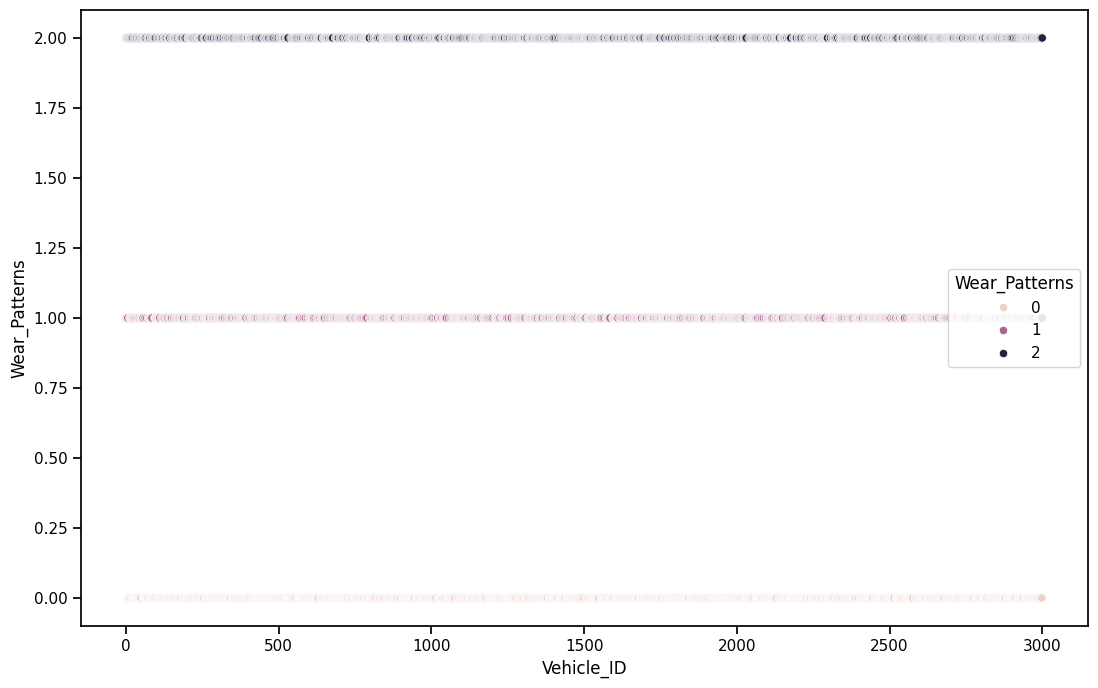

In [ ]:
plt.figure(figsize=(13, 8))
sns.scatterplot(x='Vehicle_ID', y='Wear_Patterns', hue='Wear_Patterns', data=data)
plt.show()

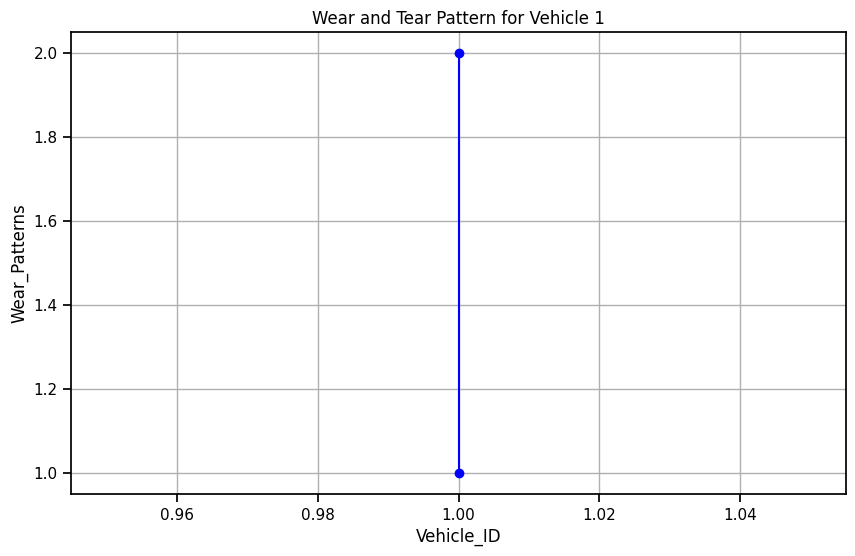

In [ ]:
vehicle_id_to_plot = 1

selected_vehicle_data = data[data['Vehicle_ID'] == vehicle_id_to_plot]

plt.figure(figsize=(10, 6))
plt.plot(selected_vehicle_data['Vehicle_ID'], selected_vehicle_data['Wear_Patterns'], marker='o', linestyle='-', color='b')
plt.title('Wear and Tear Pattern for Vehicle {}'.format(vehicle_id_to_plot))
plt.xlabel('Vehicle_ID')
plt.ylabel('Wear_Patterns')
plt.grid(True)
plt.show()

In [ ]:
dump(kmeans_model, 'wearntear_prediction_model.joblib')

['wearntear_prediction_model.joblib']